## Machine Learning TP1 : Reconnaissance de Champignon

### Import des librairies

In [17]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image, display
import random

from sklearn import preprocessing

from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import export_graphviz
from sklearn import utils
from sklearn.model_selection import train_test_split
# pd.set_option('display.max_rows', None) # Afficher toutes les lignes des dataframes
# pd.set_option('display.max_columns', None) # Afficher toutes les lignes des dataframes

### 1. Preparation des données

1.1 importer et afficher les données dans un DataFrame.

Afficher le nombre de champignons toxiques ou non.

Vérifier qu'il n'y as pas de valeurs nulles

In [4]:
# 1.1 import du fichier
df = pd.read_csv("champignons.csv")

# 1.1 nombre de champignons toxiques et nombre de cellule vide
toxicity_counts = df['toxicite'].value_counts()
null_values = df.isnull().sum()

toxicity_counts, null_values

(toxicite
 comestible    4208
 toxique       3916
 Name: count, dtype: int64,
 toxicite                   0
 surface-chapeau            0
 ecchymoses                 0
 attache-lamelles           0
 taille-lamelles            0
 forme-pied                 0
 surface-pied-sur-anneau    0
 couleur-pied-sur-anneau    0
 couleur-voile              0
 type-anneau                0
 population                 0
 dtype: int64)

1.2 Encoder les données avec une colonne 1/0 par valeur possible.Eviter de générer une matrice "sparse"\
Afficher la taille des données (lignes x colonnes) et les noms de colonnes générées.\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder

In [15]:
# 1.2
encoder = preprocessing.OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(df.columns))

encoded_shape = encoded_df.shape
encoded_columns = encoded_df.columns.tolist()

encoded_shape, encoded_columns[:10]

((8124, 42),
 ['toxicite_comestible',
  'toxicite_toxique',
  'surface-chapeau_fibreuse',
  'surface-chapeau_lisse',
  'surface-chapeau_rainurée',
  'surface-chapeau_écaillée',
  'ecchymoses_non',
  'ecchymoses_oui',
  'attache-lamelles_adhérent',
  'attache-lamelles_libre'])

1.3 Créer un nouveau DataFrame avec les données et les noms de colonne (méthode get_feature_names_out() de OneHotEncoder). Mélanger les données. Afficher le résultat.

In [16]:
# 1.3
full_encoded_df = encoded_df.copy()

shuffled_df = utils.shuffle(full_encoded_df, random_state=42)

shuffled_df.head()

,toxicite_comestible,toxicite_toxique,surface-chapeau_fibreuse,surface-chapeau_lisse,surface-chapeau_rainurée,surface-chapeau_écaillée,ecchymoses_non,ecchymoses_oui,attache-lamelles_adhérent,attache-lamelles_libre,...,type-anneau_fibreux,type-anneau_large,type-anneau_pendant,type-anneau_évasé,population_abondante,population_clairsemée,population_dispersée,population_nombreuse,population_solitaire,population_variée
1971,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6654,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5606,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3332,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6988,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


1.4 Creer 4 jeux de données : train features et labels (70%) et dev features et labels (30%).\
Utiliser toxicite_toxique comme label. Ne pas garder de label (toxicite_toxique et toxicite_comestible) dans les features !

In [18]:
# 1.4

X = encoded_df.drop(columns=['toxicite_toxique'])
y = encoded_df['toxicite_toxique']
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_dev shape:", X_dev.shape)
print("y_dev shape:", y_dev.shape)

X_train shape: (5686, 41)
y_train shape: (5686,)
X_dev shape: (2438, 41)
y_dev shape: (2438,)


## 2. Arbre de décision

2.1 Entrainer un arbre de décision sur les données d'apprentissage. Afficher l'arbre obtenu en utilisant plot_tree.

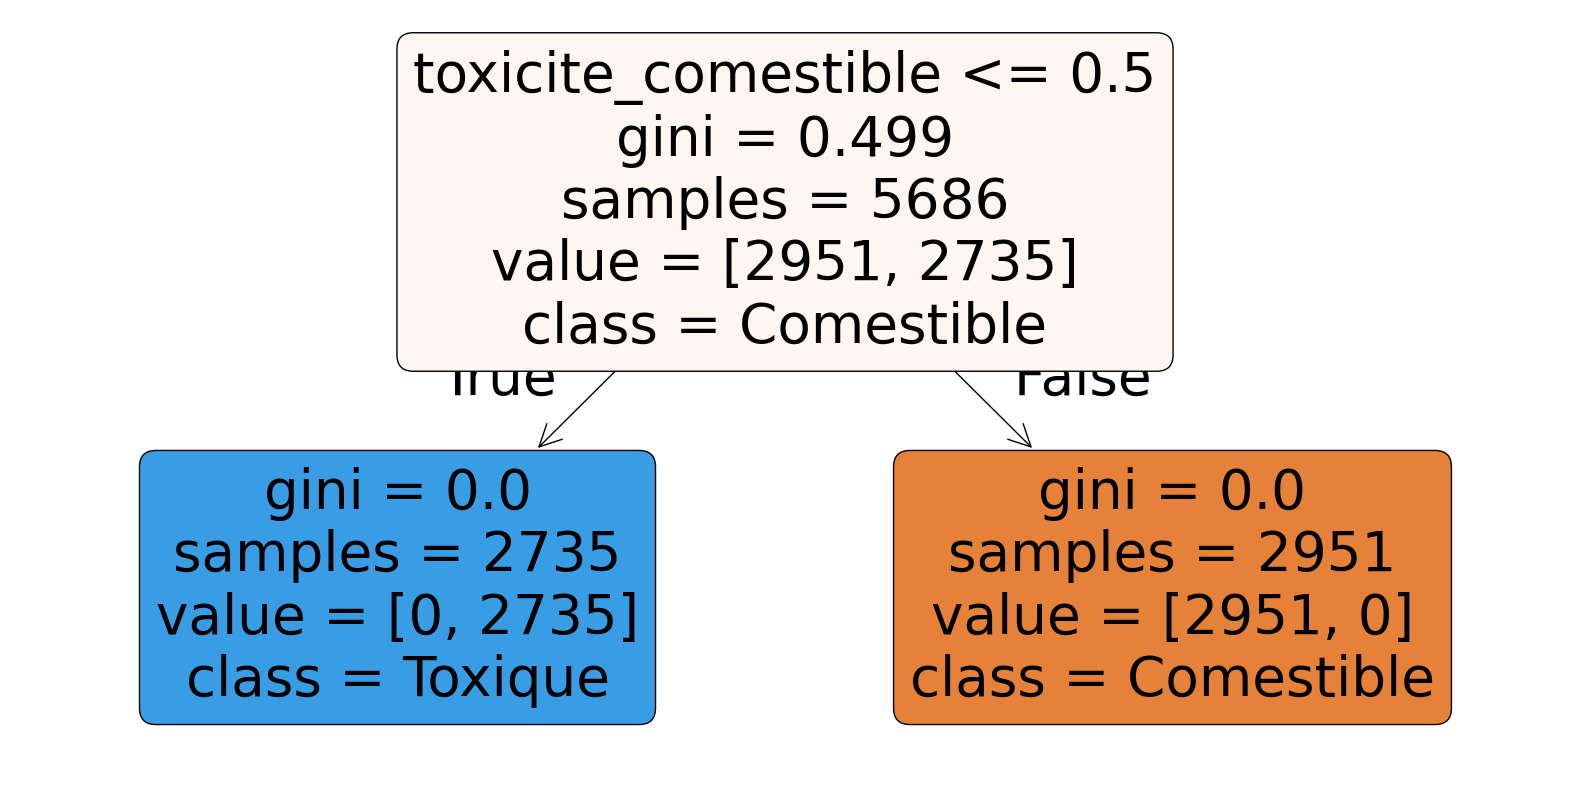

In [21]:
import matplotlib.pyplot as plt

clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=["Comestible", "Toxique"], rounded=True)
plt.show()

2.2 Afficher l'arbre obtenu en utilisant graphwiz

In [23]:
import graphviz

# Exporter l'arbre sous forme de fichier .dot
dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=X_train.columns,
    class_names=["Comestible", "Toxique"],
    filled=True,
    rounded=True,
    special_characters=True
)

# Afficher l'arbre avec graphviz
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Sauvegarde en fichier PDF nommé "decision_tree.pdf"
graph.view()

'Source.gv.pdf'

2.3 Mesurer la précision du modèle sur les données de dev

## 3. Modèle de forêt

3.1 Réalisez un algorithme de Random Forest sur les données. Utiliser 500 arbres et une profondeur de 6.

3.2 Afficher trois arbres au hasard.

In [ ]:
from random import randint


3.3 Mesurer la précision du modèle Random Forest sur les données de dev

## 4. optimisation des paramètres

4.1 chercher l'ensembles de données la meilleure combinaison sur max_depth/n_estimator.

Afficher les paramètre du modèle et a précision obtenue.

Réexécuter un apprentissage avec la meilleure combinaison.


In [ ]:
from sklearn.model_selection import GridSearchCV


4.2 Afficher les paramètres optimaux et la précisions obtenue sur les données dev

4.3 Classer et Afficher les caractéristiques d'importance supérieure à 1%

## 5. Stacking

Essayer différents modèles d'estimateur final

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.ensemble import StackingClassifier


## 6. Gradient Boosting

6. Exécuter un apprentissage de Gradient Boosting avec et sans "Early Stopping" sur le nombre d'estimateurs. Comparer avec le résultat sur les données dev.

## 7. (Optionnel) Recommencer les execices précédents en utilisant les "ordinal encoders". Que remarquez-vous ?